# Face Recognition

# Face recognition problems commonly fall into one of two categories:

1.Face Verification "Is this the claimed person?" For example, at some airports, you can pass through customs by letting a system scan your passport and then verifying that you (the person carrying the passport) are the correct person. A mobile phone that unlocks using your face is also using face verification. This is a 1:1 matching problem.

2.Face Recognition "Who is this person?" For example, the video lecture showed a face recognition video of Baidu employees entering the office without needing to otherwise identify themselves. This is a 1:K matching problem.

# codeing part

# 1 - Packages

In [1]:
import tensorflow
from tensorflow import keras 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import numpy as np
from keras.preprocessing import image
import os
import glob

2024-06-05 15:52:31.563654: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-05 15:52:31.563797: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-05 15:52:32.532866: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-05 15:52:33.705383: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-05 15:52:39.804808: W tensorflow/compiler/tf2

Here i am using tensorflow for bullid face recognition system. 

# Image Preprocessing using keras

In [2]:
# lets perform **Image Agumentation** to create different versions 
# load the train and test image from face images foldar 
trian_image="Face Images/Final Training Images" 
test_images="Face Images/Final Testing Images"

In [3]:
## ImageDataGenerator main use for rotate the image in dgree
train_gen = ImageDataGenerator(
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [4]:
# No transformations are made on the test data
test_gen = ImageDataGenerator()

In [5]:
# Generating training data 
training_data = train_gen.flow_from_directory(
    trian_image, 
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'categorical'
)

Found 244 images belonging to 16 classes.


In [6]:
# Generating test data  
testing_data = test_gen.flow_from_directory(
    test_images, 
    target_size = (100,100),
    batch_size = 30,
    class_mode = 'categorical'
)

Found 64 images belonging to 16 classes.


In [7]:
## here are total 208 image and this image are belong from diffrent 16 class

In [9]:
training_data.class_indices

{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face2': 8,
 'face3': 9,
 'face4': 10,
 'face5': 11,
 'face6': 12,
 'face7': 13,
 'face8': 14,
 'face9': 15}

here are  observe, the above dictionary is having keys as face-names and values as numbers.we need to get the face-name out of it. we need to swap key as numeric and value is face name 

# swap key and value 


key is numeric number btween 0-15 for 16 class and value is face name 

In [10]:
# training_data have numeric tag for each face
Train_class = training_data.class_indices

In [11]:
# lets store them in a dictionary with swap for future reference
Result_class = {}
for value_tag, face_tag in zip(Train_class.values(),Train_class.keys()):
    Result_class[value_tag] = face_tag

In [12]:
print(Result_class)

{0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face2', 9: 'face3', 10: 'face4', 11: 'face5', 12: 'face6', 13: 'face7', 14: 'face8', 15: 'face9'}


# Building the  Model 

In [13]:
# Initializing the Convolutional Neural Network 
Model = Sequential()

In [15]:
# step 1
# we are using the format (100,100,3) because we are using TensorFlow backend
# It means 3 matrix of size (100x100) pixels representing Red, Green and Blue components of pixels 
# activation function is relu
Model.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), input_shape = (100,100,3),activation='relu')) 

# Maxplooing layer (2,2) 
Model.add(MaxPool2D(pool_size=(2,2)))

#here 32 chanel (3,3) kernal  
# maxpooling (2,2)
Model.add(Conv2D(32,kernel_size=(3,3),strides=(1,1),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2))) 

Model.add(Conv2D(64,kernel_size=(2,2),strides=(1,1),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2))) 

Model.add(Conv2D(128,kernel_size=(2,2),strides=(1,1),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))

# Add a flatten layer to convert the vector to one dimensional 
Model.add(Flatten()) 

#Add dense layers and Initialize weights using 
#kernal initializer for better learing of image features and classification 

Model.add(Dense(64,activation='relu'))
Model.add(Dense(16,activation='softmax'))

In [17]:
# compile the model here  using loss as categorical_crossentropy and adam optimizer 
Model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['Accuracy'])


In [20]:
# Model Training 
history=Model.fit_generator(training_data,
          epochs = 30,
          validation_data=testing_data,
                   )

Epoch 1/30


/tmp/ipykernel_26937/897841317.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=Model.fit_generator(training_data,


9/9 [==============================] - 3s 278ms/step - loss: 0.0787 - Accuracy: 0.9754 - val_loss: 0.1370 - val_Accuracy: 0.9531
Epoch 2/30
9/9 [==============================] - 3s 263ms/step - loss: 0.0293 - Accuracy: 0.9877 - val_loss: 0.1143 - val_Accuracy: 0.9688
Epoch 3/30
9/9 [==============================] - 3s 263ms/step - loss: 0.0224 - Accuracy: 1.0000 - val_loss: 0.1072 - val_Accuracy: 0.9844
Epoch 4/30
9/9 [==============================] - 3s 266ms/step - loss: 0.0164 - Accuracy: 0.9959 - val_loss: 0.1270 - val_Accuracy: 0.9531
Epoch 5/30
9/9 [==============================] - 3s 265ms/step - loss: 0.0124 - Accuracy: 1.0000 - val_loss: 0.0965 - val_Accuracy: 0.9688
Epoch 6/30
9/9 [==============================] - 3s 265ms/step - loss: 0.0061 - Accuracy: 1.0000 - val_loss: 0.0898 - val_Accuracy: 0.9844
Epoch 7/30
9/9 [==============================] - 3s 266ms/step - loss: 0.0050 - Accuracy: 1.0000 - val_loss: 0.0888 - val_Accuracy: 0.9844
Epoch 8/30
9/9 [===============

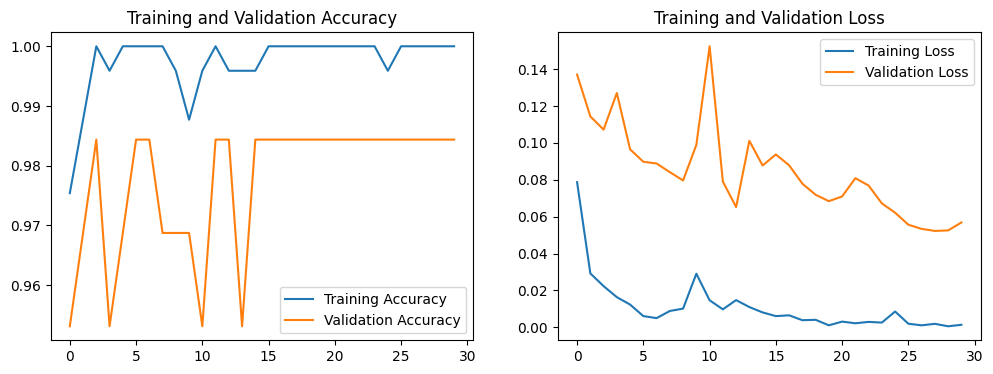

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['Accuracy'], label='Training Accuracy')
plt.plot(history.history['val_Accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [25]:
#Using the Classifier to make predictions on unseen test images 
ImagePath="Face Images/Final Testing Images/face5/4face5.jpg"
test_image=image.load_img(ImagePath,target_size=(100, 100))
test_image=image.img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result=Model.predict(test_image,verbose=0) 
print('Prediction is: ',Result_class[np.argmax(result)])

Prediction is:  face5


In [26]:
main_ = "Face Images/Final Testing Images"
img_paths = glob.glob(os.path.join(main_,'**','*.jpg'))

In [27]:
img_paths

['Face Images/Final Testing Images/face4/3face4.jpg',
 'Face Images/Final Testing Images/face4/1face4.jpg',
 'Face Images/Final Testing Images/face4/4face4.jpg',
 'Face Images/Final Testing Images/face4/2face4.jpg',
 'Face Images/Final Testing Images/face14/1face14.jpg',
 'Face Images/Final Testing Images/face14/4face14.jpg',
 'Face Images/Final Testing Images/face14/2face14.jpg',
 'Face Images/Final Testing Images/face14/3face14.jpg',
 'Face Images/Final Testing Images/face10/3face10.jpg',
 'Face Images/Final Testing Images/face10/4face10.jpg',
 'Face Images/Final Testing Images/face10/2face10.jpg',
 'Face Images/Final Testing Images/face10/1face10.jpg',
 'Face Images/Final Testing Images/face6/2face6.jpg',
 'Face Images/Final Testing Images/face6/4face6.jpg',
 'Face Images/Final Testing Images/face6/1face6.jpg',
 'Face Images/Final Testing Images/face6/3face6.jpg',
 'Face Images/Final Testing Images/face13/2face13.jpg',
 'Face Images/Final Testing Images/face13/3face13.jpg',
 'Face I

In [28]:
for path in img_paths:
    test_image = image.load_img(path,target_size=(100,100))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image,axis =0)
    result = Model.predict(test_image,verbose=0)
    print('Prediction: ',Result_class[np.argmax(result)])

Prediction:  face4
Prediction:  face4
Prediction:  face4
Prediction:  face4
Prediction:  face14
Prediction:  face14
Prediction:  face14
Prediction:  face14
Prediction:  face10
Prediction:  face10
Prediction:  face10
Prediction:  face10
Prediction:  face6
Prediction:  face6
Prediction:  face6
Prediction:  face6
Prediction:  face13
Prediction:  face13
Prediction:  face13
Prediction:  face13
Prediction:  face12
Prediction:  face12
Prediction:  face12
Prediction:  face12
Prediction:  face3
Prediction:  face3
Prediction:  face3
Prediction:  face3
Prediction:  face2
Prediction:  face2
Prediction:  face2
Prediction:  face2
Prediction:  face15
Prediction:  face15
Prediction:  face15
Prediction:  face15
Prediction:  face9
Prediction:  face9
Prediction:  face9
Prediction:  face9
Prediction:  face7
Prediction:  face7
Prediction:  face7
Prediction:  face7
Prediction:  face1
Prediction:  face14
Prediction:  face1
Prediction:  face1
Prediction:  face16
Prediction:  face16
Prediction:  face16
Predict

# use early stoping

In [29]:
from keras.callbacks import EarlyStopping
call = EarlyStopping(
                    min_delta=0.005,
                    patience=5,
                     verbose=1
                    )

In [32]:
from tensorflow.keras.optimizers import Adam
Model.compile(loss='categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics = ['Accuracy'])

In [33]:
history=Model.fit_generator(training_data,
          epochs = 30,
          validation_data=testing_data,
                   )

/tmp/ipykernel_26937/2872354329.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=Model.fit_generator(training_data,


Epoch 1/30
9/9 [==============================] - 4s 299ms/step - loss: 0.3513 - Accuracy: 0.8975 - val_loss: 0.1581 - val_Accuracy: 0.9531
Epoch 2/30
9/9 [==============================] - 3s 286ms/step - loss: 0.1553 - Accuracy: 0.9385 - val_loss: 0.3050 - val_Accuracy: 0.8906
Epoch 3/30
9/9 [==============================] - 3s 273ms/step - loss: 0.0704 - Accuracy: 0.9877 - val_loss: 0.1161 - val_Accuracy: 0.9688
Epoch 4/30
9/9 [==============================] - 3s 269ms/step - loss: 0.1763 - Accuracy: 0.9467 - val_loss: 0.1187 - val_Accuracy: 0.9219
Epoch 5/30
9/9 [==============================] - 2s 258ms/step - loss: 0.0664 - Accuracy: 0.9836 - val_loss: 0.4637 - val_Accuracy: 0.9062
Epoch 6/30
9/9 [==============================] - 2s 253ms/step - loss: 0.5917 - Accuracy: 0.8443 - val_loss: 0.2286 - val_Accuracy: 0.9062
Epoch 7/30
9/9 [==============================] - 3s 267ms/step - loss: 0.1486 - Accuracy: 0.9426 - val_loss: 0.3665 - val_Accuracy: 0.9219
Epoch 8/30
9/9 [====

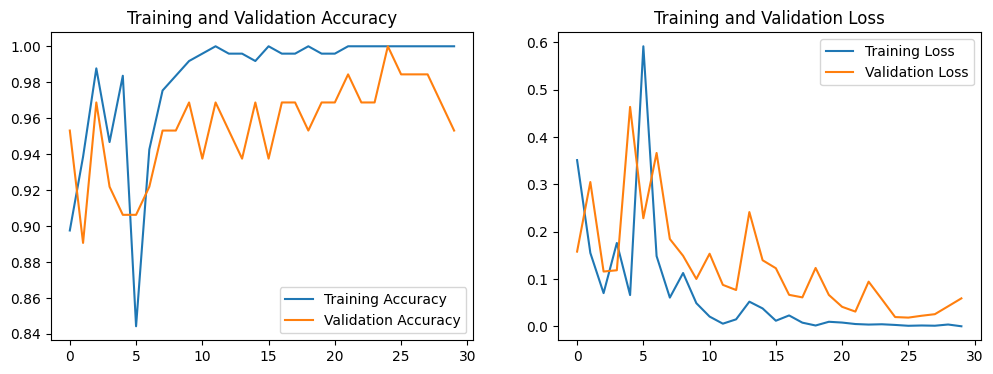

In [34]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['Accuracy'], label='Training Accuracy')
plt.plot(history.history['val_Accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# train the model using transfarlearning

i am using ResNet50 Model 


In [48]:
import tensorflow as tf 
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D 
from tensorflow.keras.models import Model

In [36]:
## I have already train and test data  
## tain_img 
## test_img 

# Data Preprocessing and Augmentation

In [49]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    trian_image,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

Found 244 images belonging to 16 classes.


In [50]:
test_generator = train_datagen.flow_from_directory(
    test_images,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

Found 64 images belonging to 16 classes.


In [51]:
# Load Pretrained ResNet50 Model 
res_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [52]:
# tarin the model 

x = res_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

In [53]:
model = Model(inputs=res_model.input, outputs=predictions)

In [54]:
# Freeze Base res model Layers
for layer in res_model.layers:
    layer.trainable = False

In [56]:
# Compile the Model with 20 epoch
history = model.fit(train_generator, epochs=20, verbose=1)


Epoch 1/20
13/13 [==============================] - 110s 4s/step - loss: 7.5633 - accuracy: 0.0492
Epoch 2/20
13/13 [==============================] - 43s 3s/step - loss: 2.7837 - accuracy: 0.0492
Epoch 3/20
13/13 [==============================] - 42s 3s/step - loss: 2.7804 - accuracy: 0.0574
Epoch 4/20
13/13 [==============================] - 46s 3s/step - loss: 2.7714 - accuracy: 0.0820
Epoch 5/20
13/13 [==============================] - 43s 3s/step - loss: 2.7711 - accuracy: 0.0820
Epoch 6/20
13/13 [==============================] - 44s 3s/step - loss: 2.7784 - accuracy: 0.0738
Epoch 7/20
13/13 [==============================] - 42s 3s/step - loss: 2.7791 - accuracy: 0.0615
Epoch 8/20
13/13 [==============================] - 42s 3s/step - loss: 2.7689 - accuracy: 0.0820
Epoch 9/20
13/13 [==============================] - 44s 3s/step - loss: 2.7680 - accuracy: 0.0820
Epoch 10/20
13/13 [==============================] - 43s 3s/step - loss: 2.7661 - accuracy: 0.0820
Epoch 11/20
13/13 